In [169]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pickle

#Load Data

In [170]:
#here we have cleaned data from the prior work of data cleaning and exploration data
df = pd.read_csv('C:/Users/user/Desktop/10Academy/Week-1/data/cleaned_data.csv')

In [171]:
df.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",2019-04-04 12:01:00,770.00,2019-04-25 14:35:00,662.00,"1,823,652.00",208201448079117,33664962239,35521209507511,9.16456699548519E+015,...,"15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",2019-04-09 13:04:00,235.00,2019-04-25 08:15:00,606.00,"1,365,104.00",208201909211140,33681854413,35794009006359,L77566A,...,"20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",2019-04-09 17:42:00,1.00,2019-04-25 11:58:00,652.00,"1,361,762.00",208200314458056,33760627129,35281510359387,D42335A,...,"19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,442,799,616.00",2019-04-10 00:31:00,486.00,2019-04-25 07:36:00,171.00,"1,321,509.00",208201402342131,33750343200,35356610164913,T21824A,...,"21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,700,928.00",2019-04-12 20:10:00,565.00,2019-04-25 10:40:00,954.00,"1,089,009.00",208201401415120,33699795932,35407009745539,D88865A,...,"15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00","38,542,814.00","569,138,589.00"


In [148]:
# column names
#list(df.columns)
df.columns.tolist()


['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (By

In [149]:
# number of data points
#df.shape
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 150001 rows and 45 columns


In [172]:
###################################PLOTTING FUNCTIONS For User Analytics on Telcco###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def format_float(value):
    return f'{value:,.2f}'

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]


pd.options.display.float_format = format_float

# Task 1:

#### Top 10 handsets used by the customers

In [173]:
# The top 10 handsets used by the customers
top10_handsets_customers = df[['Handset Type','IMSI']].groupby(['Handset Type'])
#top10 = data.sort_values(['Handset Type','IMSI'], ascending=False).groupby('Handset Type')
top10_handsets_customers = top10_handsets_customers['IMSI'].nunique()
top10_handsets_customers = top10_handsets_customers.reset_index(name='Total')
top10_handsets_customers = top10_handsets_customers.sort_values(['Total'], ascending=False)
top10_handsets_customers.head(10)

,Handset Type,Total
316,Huawei B528S-23A,10641
53,Apple iPhone 6S (A1688),6765
1395,undefined,6716
49,Apple iPhone 6 (A1586),6271
59,Apple iPhone 7 (A1778),4721
73,Apple iPhone Se (A1723),3764
66,Apple iPhone 8 (A1905),3550
955,Samsung Galaxy S8 (Sm-G950F),3275
78,Apple iPhone Xr (A2105),3077
888,Samsung Galaxy J5 (Sm-J530),2760


#### top 3 handset manufacturers

In [174]:
# top 3 handset manufacturers
top3_handset_manufacturers = df[['Handset Manufacturer','IMSI']].groupby(['Handset Manufacturer'])
top3_handset_manufacturers = top3_handset_manufacturers['IMSI'].nunique().nlargest(3).reset_index()
top3_handset_manufacturers

,Handset Manufacturer,IMSI
0,Apple,42687
1,Samsung,30980
2,Huawei,21742


#### top 5 handsets per top 3 handset manufacturer

#### top 5 handset manfacturer for Apple

In [153]:
# top 5 handset manfacturer for Apple
Apple_handsets = df[df['Handset Manufacturer']=='Apple']
Apple_handsets = Apple_handsets.groupby(['Handset Type'])['IMSI']
Apple_handsets = Apple_handsets.nunique().nlargest(5).reset_index()
Apple_handsets

,Handset Type,IMSI
0,Apple iPhone 6S (A1688),6765
1,Apple iPhone 6 (A1586),6271
2,Apple iPhone 7 (A1778),4721
3,Apple iPhone Se (A1723),3764
4,Apple iPhone 8 (A1905),3550


#### top 5 handset manfacturer for Huawei

In [154]:
# top 5 handset manfacturer for Huawei
Huawei_handsets = df[df['Handset Manufacturer']=='Huawei']
Huawei_handsets = Huawei_handsets.groupby(['Handset Type'])['IMSI']
Huawei_handsets = Huawei_handsets.nunique().nlargest(5).reset_index()
Huawei_handsets

,Handset Type,IMSI
0,Huawei B528S-23A,10638
1,Huawei P20 Lite Huawei Nova 3E,1534
2,Huawei E5180,1185
3,Huawei P20,1110
4,Huawei Y6 2018,757


#### top 5 handset manfacturer for Samsung

In [155]:
#top 5 handset manfacturer for Samsung
Samsung_handset = df[df['Handset Manufacturer']=='Samsung']
Samsung_handset = Samsung_handset.groupby(['Handset Type'])['IMSI']
Samsung_handset = Samsung_handset.nunique().nlargest(5).reset_index()
Samsung_handset

,Handset Type,IMSI
0,Samsung Galaxy S8 (Sm-G950F),3275
1,Samsung Galaxy J5 (Sm-J530),2760
2,Samsung Galaxy A5 Sm-A520F,2721
3,Samsung Galaxy J3 (Sm-J330),2606
4,Samsung Galaxy S7 (Sm-G930X),2310


#### Task 1.1 - Your employer wants to have an overview of the users’ behavior on those

applications.

Aggregate per user the following information in the column

    *   number of xDR sessions
    *   Session duration
    *   the total download (DL) and upload (UL) data
    *   the total data volume (in Bytes) during this session for each application



##### number of xDR sessions

In [175]:
number_of_xDR_sessions = df.groupby('MSISDN/Number')
number_of_xDR_sessions.agg({"Bearer Id": "count"})

,Bearer Id
MSISDN/Number,
33601001722,1
33601001754,1
33601002511,1
33601007832,1
33601008617,2
...,...
33789996170,1
33789997247,1
3197020876596,1


In [157]:
#number_of_xDR_sessions.describe()

#### Session duration

In [158]:
#Session duration
session_duration = df.groupby('MSISDN/Number')
session_duration.agg({"Dur. (ms)": "sum"})

,Dur. (ms)
MSISDN/Number,
33601001722,"116,720.00"
33601001754,"181,230.00"
33601002511,"134,969.00"
33601007832,"49,878.00"
33601008617,"37,104.00"
...,...
33789996170,"8,810.00"
33789997247,"140,988.00"
3197020876596,"877,385.00"


In [159]:
#session_duration.describe()

#### the total download (DL) and upload (UL) data

In [176]:
# the total download (DL) and upload (UL) data
total_DL_UL = df.groupby(['IMSI'])['Total UL (Bytes)', 'Total DL (Bytes)'].sum()
total_DL_UL.head(5)

C:\Users\user\AppData\Local\Temp\ipykernel_5924\433596818.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_DL_UL = df.groupby(['IMSI'])['Total UL (Bytes)', 'Total DL (Bytes)'].sum()


,Total UL (Bytes),Total DL (Bytes)
IMSI,,
204047108489451,"60,456,049.00","78,697,597.00"
204080810288647,"37,295,915.00","194,828,056.00"
208200101016140,"53,794,658.00","31,376,981.00"
208200101127285,"33,583,272.00","392,918,313.00"
208200101148045,"71,325,004.00","961,767,023.00"


In [161]:
#total_DL_UL.describe()

#### upper and lower boundries

In [177]:
"""
calculate the boundaries outside which sit the outliers
for a Gaussian distribution
"""
def normal_boundaries(df, variable, distance):
    upper_boundary = df[variable].mean() + distance * df[variable].std()
    lower_boundary = df[variable].mean() - distance * df[variable].std()
    return upper_boundary, lower_boundary

In [178]:
# Upper and lower limits of duration
dur_upper_limit, dur_lower_limit = normal_boundaries(df, 'Dur. (ms)', 1.5)
dur_upper_limit, dur_lower_limit

(226164.4864389334, -16947.608538119413)

In [179]:
# Replacing the outliers by the maximum and minimum limit
df['Dur. (ms)']= np.where(df['Dur. (ms)'] > dur_upper_limit, dur_upper_limit,\
                       np.where(df['Dur. (ms)'] < dur_lower_limit, dur_lower_limit, df['Dur. (ms)']))

#### Total data volume

In [180]:
x = df['Total_data'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']
x.describe()

count       150,001.00
mean    495,764,644.50
std     244,380,987.06
min      28,956,107.00
25%     284,476,442.00
50%     496,861,209.00
75%     706,505,411.00
max     955,984,776.00
dtype: float64

In [ ]:
grouped_data= df.groupby('MSISDN/Number')
grouped_data.agg('Total_data').describe()

In [181]:
# total data
def total_data(df):
    cols = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
            'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
            'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
            'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']
    df['Social Media'] = df[cols[0]] + df[cols[1]]
    df['Google'] = df[cols[2]] + df[cols[3]]
    df['Email'] = df[cols[4]] + df[cols[5]]
    df['Youtube'] = df[cols[6]] + df[cols[7]]
    df['Netflix'] = df[cols[8]] + df[cols[9]]
    df['Gaming'] = df[cols[10]] + df[cols[11]]
    df['Other'] = df[cols[12]] + df[cols[13]]
    df['Total'] = df[cols[14]] + df[cols[15]]
    return df
data = total_data(df)

#### Total data volume (in Bytes) for Email

In [247]:
email_data = data['Email']
email_data

0        3,701,304.00
1          937,385.00
2        3,363,124.00
3        2,070,983.00
4        2,110,349.00
             ...     
149996     690,876.00
149997   2,121,718.00
149998   2,058,277.00
149999   2,850,914.00
150000   2,259,102.31
Name: Email, Length: 150001, dtype: float64

In [248]:
email_data.describe()

count     150,001.00
mean    2,259,102.31
std     1,071,109.06
min         8,359.00
25%     1,359,344.00
50%     2,263,567.00
75%     3,159,818.00
max     4,518,036.00
Name: Email, dtype: float64

<AxesSubplot:>

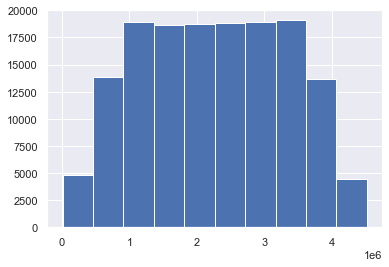

In [249]:
email_data.hist()

#### Total data volume (in Bytes) for Social media

In [250]:
social_data = data['Social Media']
social_data 

0        1,570,185.00
1        1,933,278.00
2        1,726,277.00
3          657,493.00
4          912,788.00
             ...     
149996   3,517,065.00
149997   2,352,181.00
149998   1,260,239.00
149999     823,109.00
150000   1,828,250.21
Name: Social Media, Length: 150001, dtype: float64

In [251]:
social_data.describe()

count     150,001.00
mean    1,828,250.21
std     1,035,646.14
min         1,563.00
25%       932,218.00
50%     1,826,471.00
75%     2,727,487.00
max     3,650,861.00
Name: Social Media, dtype: float64

<AxesSubplot:>

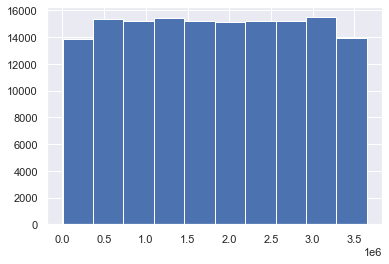

In [252]:
social_data.hist()

#### Total data volume (in Bytes) for Google

In [253]:
google_data = data['Google']
google_data 

0         2,905,912.00
1         4,414,096.00
2        10,229,119.00
3        11,811,761.00
4         7,748,843.00
              ...     
149996   12,784,914.00
149997    4,415,361.00
149998    6,585,469.00
149999    7,757,267.00
150000    7,807,294.55
Name: Google, Length: 150001, dtype: float64

In [254]:
google_data.describe()

count      150,001.00
mean     7,807,294.55
std      3,516,420.24
min         40,330.00
25%      4,943,599.00
50%      7,812,835.00
75%     10,682,796.00
max     15,528,782.00
Name: Google, dtype: float64

<AxesSubplot:>

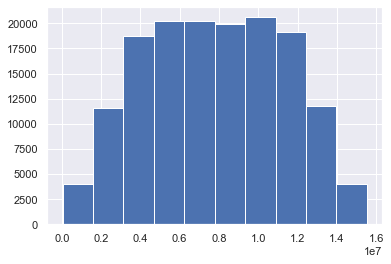

In [255]:
google_data.hist()

#### Total data volume (in Bytes) for Youtube

In [256]:
youtube_data = data['Youtube']
youtube_data

0        18,355,943.00
1        39,359,124.00
2        34,425,237.00
3        36,534,765.00
4        34,222,253.00
              ...     
149996   27,955,095.00
149997   22,165,518.00
149998   24,516,413.00
149999   17,122,508.00
150000   22,643,482.64
Name: Youtube, Length: 150001, dtype: float64

In [257]:
youtube_data.describe()

count      150,001.00
mean    22,643,482.64
std      9,246,800.31
min         78,903.00
25%     15,998,463.00
50%     22,661,770.00
75%     29,292,604.00
max     45,190,078.00
Name: Youtube, dtype: float64

<AxesSubplot:>

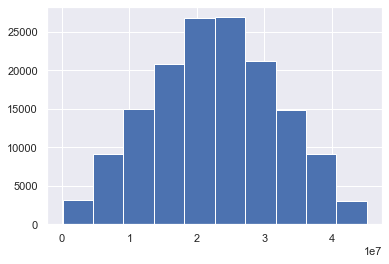

In [258]:
youtube_data.hist()

#### Total data volume (in Bytes) for Netflix

In [259]:
netflix_data = data['Netflix']
netflix_data

0        17,855,187.00
1        35,565,545.00
2        23,751,202.00
3        15,092,588.00
4        17,539,799.00
              ...     
149996   37,561,864.00
149997   40,643,294.00
149998   15,029,702.00
149999   16,494,842.00
150000   22,628,606.54
Name: Netflix, Length: 150001, dtype: float64

In [260]:
netflix_data.describe()

count      150,001.00
mean    22,628,606.54
std      9,260,820.09
min         98,432.00
25%     15,979,455.00
50%     22,635,545.00
75%     29,290,445.00
max     45,198,153.00
Name: Netflix, dtype: float64

<AxesSubplot:>

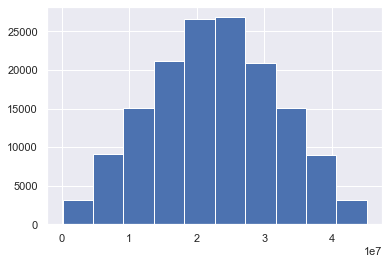

In [261]:
netflix_data.hist()

#### Total data volume (in Bytes) for Gaming

In [262]:
gaming_data = data['Gaming']
gaming_data

0        292,426,453.00
1        609,920,783.00
2        229,980,251.00
3        810,387,875.00
4        531,237,049.00
              ...      
149996   535,806,880.00
149997   631,628,095.00
149998   566,933,800.00
149999   355,066,446.00
150000   430,333,100.71
Name: Gaming, Length: 150001, dtype: float64

In [263]:
gaming_data.describe()

count       150,001.00
mean    430,333,100.71
std     244,019,924.02
min         306,358.00
25%     218,727,939.00
50%     431,614,977.00
75%     641,415,878.00
max     859,202,784.00
Name: Gaming, dtype: float64

<AxesSubplot:>

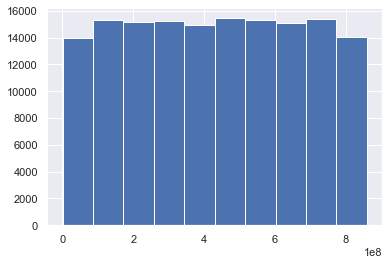

In [264]:
gaming_data.hist()

# Task 2 - User Engagement analysis

Track the user’s engagement using the following engagement metrics: 
1. sessions frequency 
2. the duration of the session 
3. the sessions total traffic (download and upload (bytes))

#### Task 2.1

Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric

In [186]:
df2 = df.copy()
df2['Total'] = df2['Total UL (Bytes)'] + df2['Total DL (Bytes)']
df2 = df2.groupby('MSISDN/Number')\
    .agg({"Bearer Id": "count", 'Dur. (ms).1':'sum', 'Total':'sum'})

df2.head()

,Bearer Id,Dur. (ms).1,Total
MSISDN/Number,,,
33601001722,1,"116,720,140.00","878,690,574.00"
33601001754,1,"181,230,963.00","156,859,643.00"
33601002511,1,"134,969,374.00","595,966,483.00"
33601007832,1,"49,878,024.00","422,320,698.00"
33601008617,2,"37,104,453.00","1,457,410,944.00"


In [35]:
### Top 10 Beaerer id
df2.sort_values(by='Bearer Id', ascending=False).head(10)

,Bearer Id,Dur. (ms).1,Total
MSISDN/Number,,,
33663706799,1067,7.265611e+10,5.319636e+11
33626320676,18,8.791937e+09,7.971167e+09
33614892860,17,9.966906e+09,8.846226e+09
33625779332,17,1.855376e+10,8.499621e+09
33659725664,16,4.035436e+09,7.705863e+09
33675877202,15,4.865954e+09,7.891111e+09
33760536639,15,9.279442e+09,8.514774e+09
33667163239,13,8.744922e+09,5.618394e+09
33604515716,12,5.207995e+09,5.487855e+09


In [36]:
### Top 10 Duration of session
df2.sort_values(by='Dur. (ms).1', ascending=False).head(10)

,Bearer Id,Dur. (ms).1,Total
MSISDN/Number,,,
33663706799,1067,7.265611e+10,5.319636e+11
33625779332,17,1.855376e+10,8.499621e+09
33614892860,17,9.966906e+09,8.846226e+09
33760536639,15,9.279442e+09,8.514774e+09
33626320676,18,8.791937e+09,7.971167e+09
33667163239,13,8.744922e+09,5.618394e+09
33662840755,9,6.614274e+09,4.000098e+09
33664693736,9,6.288736e+09,5.682007e+09
33603127838,12,6.287767e+09,4.976195e+09


In [39]:
#the sessions total traffic (download and upload (bytes))
df2.sort_values(by='Total', ascending=False).head(10)

,Bearer Id,Dur. (ms).1,Total
MSISDN/Number,,,
33663706799,1067,7.265611e+10,5.319636e+11
33614892860,17,9.966906e+09,8.846226e+09
33760536639,15,9.279442e+09,8.514774e+09
33625779332,17,1.855376e+10,8.499621e+09
33626320676,18,8.791937e+09,7.971167e+09
33675877202,15,4.865954e+09,7.891111e+09
33659725664,16,4.035436e+09,7.705863e+09
33666464084,11,4.536764e+09,7.308501e+09
33760413819,12,5.321674e+09,7.132371e+09


In [44]:
# join customers per engagement metric
sessions_frequency = df2.groupby('MSISDN/Number').agg({"Bearer Id": "count"})
session_duration = df2.groupby('MSISDN/Number').agg({"Dur. (ms).1": "sum"})
total_traffic = df2.groupby('MSISDN/Number').agg({"Total": "sum"})
joined_data =pd.DataFrame(sessions_frequency.join(session_duration, how='left')).join(total_traffic, how='left')
joined_data

,Bearer Id,Dur. (ms).1,Total
MSISDN/Number,,,
33601001722,1,116720140.0,8.786906e+08
33601001754,1,181230963.0,1.568596e+08
33601002511,1,134969374.0,5.959665e+08
33601007832,1,49878024.0,4.223207e+08
33601008617,1,37104453.0,1.457411e+09
...,...,...,...
33789996170,1,8810688.0,7.146416e+08
33789997247,1,140988659.0,4.803073e+08
3197020876596,1,877385325.0,2.321240e+08


In [45]:
joined_data.describe() #describe the joined customers per engagement metric

,Bearer Id,Dur. (ms).1,Total
count,106856.0,1.068560e+05,1.068560e+05
mean,1.0,1.468467e+08,6.959384e+08
std,0.0,2.897122e+08,1.697806e+09
min,1.0,7.142988e+06,3.324901e+07
25%,1.0,7.130834e+07,3.585617e+08
50%,1.0,1.027402e+08,6.179299e+08
75%,1.0,1.728000e+08,8.574377e+08
max,1.0,7.265611e+10,5.319636e+11


Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement

In [47]:
min_max_scaler = preprocessing.MinMaxScaler()
df_values = df2.values

scalled_values = min_max_scaler.fit_transform(df_values)
df_normalized = pd.DataFrame(data=scalled_values, columns=df2.columns)


kmeans = KMeans(n_clusters=3).fit(df_normalized)

In [48]:
print(kmeans.cluster_centers_)

[[2.33940270e-04 1.49372140e-03 1.09791323e-03]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [2.13643022e-03 7.39096546e-03 3.04374266e-03]]


Compute the minimum, maximum, average & total non- normalized metrics for each cluster.
Interpret your results visually with accompanying text explaining your findings.

In [58]:
cluster = kmeans.predict(df_normalized)
eng_df = df2.copy()
eng_df['cluster-engagement']  = cluster


In [59]:
cluster_group_df = eng_df.groupby('cluster-engagement')
cluster_0 = cluster_group_df.get_group(0)
cluster_1 = cluster_group_df.get_group(1)
cluster_2 = cluster_group_df.get_group(2)

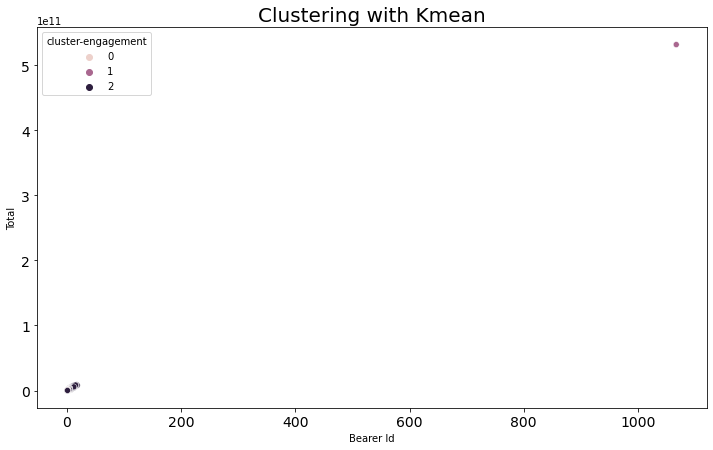

In [63]:
# Cluster 
plot_scatter(eng_df,"Bearer Id", "Total","Clustering with Kmean", "cluster-engagement", "")

In [64]:
# cluster 0
cluster_0.describe()

,Bearer Id,Dur. (ms).1,Total,cluster-engagement
count,"99,212.00","99,212.00","99,212.00","99,212.00"
mean,1.25,"115,587,132.79","617,096,507.70",0.00
std,0.49,"72,514,272.39","361,062,664.04",0.00
min,1.00,"7,142,988.00","33,249,009.00",0.00
25%,1.00,"63,657,576.50","340,106,699.75",0.00
50%,1.00,"95,747,968.50","587,671,767.50",0.00
75%,1.00,"162,510,169.50","816,527,954.75",0.00
max,6.00,"404,446,629.00","3,271,920,363.00",0.00


In [65]:
# cluster 1
cluster_1.describe()

,Bearer Id,Dur. (ms).1,Total,cluster-engagement
count,1.00,1.00,1.00,1.00
mean,"1,067.00","72,656,111,817.00","531,963,557,516.50",1.00
std,NaN,NaN,NaN,NaN
min,"1,067.00","72,656,111,817.00","531,963,557,516.50",1.00
25%,"1,067.00","72,656,111,817.00","531,963,557,516.50",1.00
50%,"1,067.00","72,656,111,817.00","531,963,557,516.50",1.00
75%,"1,067.00","72,656,111,817.00","531,963,557,516.50",1.00
max,"1,067.00","72,656,111,817.00","531,963,557,516.50",1.00


In [66]:
# cluster 2
cluster_2.describe()

,Bearer Id,Dur. (ms).1,Total,cluster-engagement
count,"7,643.00","7,643.00","7,643.00","7,643.00"
mean,3.27,"543,132,997.70","1,649,856,098.43",2.00
std,1.45,"497,596,784.27","829,931,456.28",0.00
min,1.00,"170,683,118.00","57,140,040.00",2.00
25%,2.00,"354,259,135.50","1,064,930,195.50",2.00
50%,3.00,"429,341,307.00","1,562,494,143.00",2.00
75%,4.00,"533,996,189.50","2,124,510,577.50",2.00
max,18.00,"18,553,763,486.00","8,846,226,494.00",2.00


Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [93]:
# total traffic per application for google
group_data = data.groupby('MSISDN/Number')
google_traffic = group_data.agg({'Google': "sum"})
Top10_google_traffic = google_traffic.sort_values(by='Google', ascending=False)
Top10_google_traffic.head(10)

,Google
MSISDN/Number,
33663706799,"8,250,701,538.55"
33626320676,"152,191,852.00"
33625779332,"142,307,915.00"
33614892860,"127,973,787.00"
33760536639,"123,223,099.00"
33659725664,"116,516,345.00"
33786323068,"110,254,484.00"
33675877202,"109,860,502.00"
33667163239,"105,032,696.00"


In [94]:
# total traffic per application for social media
group_data = data.groupby('MSISDN/Number')
social_traffic = group_data.agg({'Social Media': "sum"})
Top10_social_traffic = social_traffic.sort_values(by='Social Media', ascending=False)
Top10_social_traffic.head(10)

,Social Media
MSISDN/Number,
33663706799,"1,974,198,877.21"
33626320676,"43,374,779.00"
33760536639,"39,783,189.00"
33659725664,"35,412,358.00"
33614892860,"28,294,544.00"
33625779332,"27,135,500.00"
33667163239,"24,247,850.00"
33786323068,"23,974,919.00"
33669068942,"23,800,834.00"


In [95]:
# total traffic per application for email
group_data = data.groupby('MSISDN/Number')
email_traffic = group_data.agg({"Email": "sum"})
Top10_email_traffic = email_traffic.sort_values(by='Email', ascending=False)
Top10_email_traffic.head(10)

,Email
MSISDN/Number,
33663706799,"2,403,622,164.31"
33626320676,"42,418,782.00"
33614892860,"40,788,634.00"
33625779332,"40,633,966.00"
33786323068,"36,310,123.00"
33659725664,"35,999,792.00"
33760536639,"33,693,767.00"
33675877202,"31,514,421.00"
33665460546,"30,417,885.00"


In [96]:
# total traffic per application for youtube
group_data = data.groupby('MSISDN/Number')
youtube_traffic = group_data.agg({'Youtube': "sum"})
Top10_youtube_traffic = youtube_traffic.sort_values(by='Youtube', ascending=False)
Top10_youtube_traffic.head(10)

,Youtube
MSISDN/Number,
33663706799,"24,350,725,583.64"
33625779332,"452,958,769.00"
33760536639,"396,289,198.00"
33614892860,"394,370,218.00"
33626320676,"374,483,047.00"
33675877202,"317,410,572.00"
33667163239,"315,231,310.00"
33627080969,"308,790,774.00"
33760413819,"303,169,107.00"


In [97]:
# total traffic per application for netflix
group_data = data.groupby('MSISDN/Number')
netflix_traffic = group_data.agg({'Netflix': "sum"})
Top10_netflix_traffic = netflix_traffic.sort_values(by='Netflix', ascending=False)
Top10_netflix_traffic.head(10)

,Netflix
MSISDN/Number,
33663706799,"24,282,107,369.54"
33659725664,"399,519,079.00"
33614892860,"361,401,046.00"
33625779332,"356,980,607.00"
33760536639,"334,643,269.00"
33626320676,"328,725,740.00"
33760413819,"318,347,546.00"
33667163239,"313,939,488.00"
33675877202,"309,093,159.00"


In [98]:
# total traffic per application for gaming
group_data = data.groupby('MSISDN/Number')
gaming_traffic = group_data.agg({'Gaming': "sum"})
Top10_gaming_traffic = gaming_traffic.sort_values(by='Gaming', ascending=False)
Top10_gaming_traffic.head(10)

,Gaming
MSISDN/Number,
33663706799,"461,634,610,932.71"
33614892860,"7,749,432,234.00"
33760536639,"7,461,045,228.00"
33625779332,"7,326,673,487.00"
33675877202,"6,970,567,597.00"
33626320676,"6,887,572,116.00"
33659725664,"6,725,559,211.00"
33666464084,"6,646,303,338.00"
33760413819,"6,268,619,592.00"


In [99]:
# total traffic per application for other
group_data = data.groupby('MSISDN/Number')
other_traffic = group_data.agg({'Other': "sum"})
Top10_other_traffic = other_traffic.sort_values(by='Other', ascending=False)
Top10_other_traffic.head(10)

,Other
MSISDN/Number,
33663706799,"451,652,149,852.62"
33626320676,"8,167,877,776.00"
33614892860,"7,639,263,572.00"
33675877202,"6,798,515,150.00"
33625779332,"6,354,583,086.00"
33603127838,"6,326,670,874.00"
33659725664,"6,317,415,487.00"
33626948251,"5,305,447,882.00"
33627080969,"5,117,790,890.00"


Plot the top 3 most used applications using appropriate charts. 

In [265]:
all_application = data[[ 'Social Media','Google', 'Email','Youtube','Netflix','Gaming','Other']].sum()

In [266]:
all_ap = dict(all_application)
all_sum = dict(sorted(all_ap.items(), key=lambda item: item[1], reverse=True))
top3, i = {}, 0
for k, v in all_sum.items():
    if i == 3: break
    i+=1
    top3[k] = v
top3

{'Gaming': 64550395439016.7,
 'Other': 64405230908181.62,
 'Youtube': 3396545039272.6387}

In [267]:
#Get the Keys and store them in a list
labels = list(top3.keys())

# Get the Values and store them in a list
values = list(top3.values())

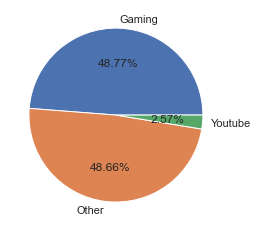

In [268]:
plt.pie(values, labels=labels, autopct='%1.2f%%')
plt.show()

Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
1. What is the optimized value of k (use elbow method for this)?  
2. Interpret your findings.

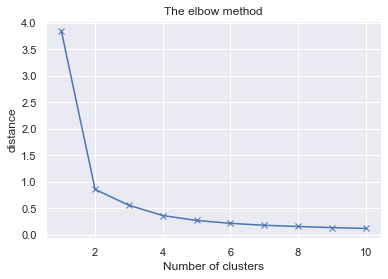

In [123]:
distance = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_normalized)
    distance.append(kmeans.inertia_)
plt.plot(range(1,11), distance, 'bx-')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('distance')
plt.show()

So from the above graph we observe that Number 3 is the optimum, and we should run with 3 cluster

In [125]:
### 
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_normalized)

cluster = kmeans.predict(df_normalized)
cluster_df = df2.copy()
cluster_df['cluster']  = cluster
cluster_df['cluster']

MSISDN/Number
33601001722        0
33601001754        0
33601002511        0
33601007832        0
33601008617        0
                  ..
33789996170        0
33789997247        0
3197020876596      2
337000037000919    0
882397108489451    2
Name: cluster, Length: 106856, dtype: int32

# Task 3 - Experience Analytics

##### Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):

1. Average TCP retransmission
2. Average RTT
3. Handset type
4. Average throughput


In [188]:
def null_percentage(df):
    number_of_rows, number_of_columns = df.shape
    df_size = number_of_rows * number_of_columns
    
    null_size = (df.isnull().sum()).sum()
    percentage = round((null_size / df_size) * 100, 2)
    print(f"Data Fraame contain null values of { percentage }%")

In [271]:
'''
TCP DL Retrans. Vol (Bytes)
TCP UL Retrans. Vol (Bytes)

Avg RTT DL (ms)
Avg RTT UL (ms)

Handset type

Avg Bearer TP DL (kbps)
Avg Bearer TP UL (kbps)

'''
#Read the cleaned csv file and store it on data
#df = pd.read_csv('C:/Users/user/Desktop/Telecommunication/data/cleaned_data.csv')
df_task_3 = df
new_netwok_df = df_task_3[['MSISDN/Number', 'Handset Type','TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',\
                         'Avg RTT DL (ms)', 'Avg RTT UL (ms)',\
                         'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']]


null_percentage(new_netwok_df)
new_netwok_df.isnull().sum()


Data Fraame contain null values of 20.17%


MSISDN/Number                   1066
Handset Type                     572
TCP DL Retrans. Vol (Bytes)    88146
TCP UL Retrans. Vol (Bytes)    96649
Avg RTT DL (ms)                27829
Avg RTT UL (ms)                27812
Avg Bearer TP DL (kbps)            1
Avg Bearer TP UL (kbps)            1
dtype: int64

In [272]:
## Fill Mising Values
for col in new_netwok_df.columns:
    if(new_netwok_df[col].isnull().sum()):
        new_netwok_df[col] = new_netwok_df[col].fillna(new_netwok_df[col].mode()[0])

C:\Users\user\AppData\Local\Temp\ipykernel_5924\3534021026.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_netwok_df[col] = new_netwok_df[col].fillna(new_netwok_df[col].mode()[0])
C:\Users\user\AppData\Local\Temp\ipykernel_5924\3534021026.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_netwok_df[col] = new_netwok_df[col].fillna(new_netwok_df[col].mode()[0])
C:\Users\user\AppData\Local\Temp\ipykernel_5924\3534021026.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [273]:
null_percentage(new_netwok_df)
new_netwok_df.isnull().sum()

Data Fraame contain null values of 0.0%


MSISDN/Number                  0
Handset Type                   0
TCP DL Retrans. Vol (Bytes)    0
TCP UL Retrans. Vol (Bytes)    0
Avg RTT DL (ms)                0
Avg RTT UL (ms)                0
Avg Bearer TP DL (kbps)        0
Avg Bearer TP UL (kbps)        0
dtype: int64

In [274]:
new_netwok_df['Total TCP Retrans'] = new_netwok_df['TCP DL Retrans. Vol (Bytes)'] +\
    new_netwok_df['TCP UL Retrans. Vol (Bytes)']
new_netwok_df['Total Throughput'] = new_netwok_df['Avg Bearer TP DL (kbps)'] +\
    new_netwok_df['Avg Bearer TP DL (kbps)']

new_netwok_df['Total RTT'] = new_netwok_df['Avg RTT DL (ms)'] + new_netwok_df['Avg RTT UL (ms)']

new_netwok_df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_5924\3159838189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_netwok_df['Total TCP Retrans'] = new_netwok_df['TCP DL Retrans. Vol (Bytes)'] +\
C:\Users\user\AppData\Local\Temp\ipykernel_5924\3159838189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_netwok_df['Total Throughput'] = new_netwok_df['Avg Bearer TP DL (kbps)'] +\
C:\Users\user\AppData\Local\Temp\ipykernel_5924\3159838189.py:6: SettingWithCopyWarning: 
A value is trying to be set on a co

,MSISDN/Number,Handset Type,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Total TCP Retrans,Total Throughput,Total RTT
0,"33,664,962,239.00",Samsung Galaxy A5 Sm-A520F,"1,330.00","1,330.00",42.00,5.00,23.00,44.00,"2,660.00",46.00,47.00
1,"33,681,854,413.00",Samsung Galaxy J5 (Sm-J530),"1,330.00","1,330.00",65.00,5.00,16.00,26.00,"2,660.00",32.00,70.00
2,"33,760,627,129.00",Samsung Galaxy A8 (2018),"1,330.00","1,330.00",28.00,5.00,6.00,9.00,"2,660.00",12.00,33.00
3,"33,750,343,200.00",undefined,"1,330.00","1,330.00",28.00,5.00,44.00,44.00,"2,660.00",88.00,33.00
4,"33,699,795,932.00",Samsung Sm-G390F,"1,330.00","1,330.00",28.00,5.00,6.00,9.00,"2,660.00",12.00,33.00


In [275]:
aggregate = {'Handset Type':'first','Total TCP Retrans':'sum', 'Total Throughput':'sum', 'Total RTT':'sum'}
columns = ['MSISDN/Number','Bearer Id','Handset Type', 'Total TCP Retrans', 'Total Throughput', 'Total RTT']
network_per_user_df = new_netwok_df.groupby('MSISDN/Number').agg(aggregate).reset_index()
network_per_user_df.head(10)

,MSISDN/Number,Handset Type,Total TCP Retrans,Total Throughput,Total RTT
0,"33,601,001,722.00",Huawei P20 Lite Huawei Nova 3E,"2,660.00",74.00,46.00
1,"33,601,001,754.00",Apple iPhone 7 (A1778),"2,660.00",96.00,31.00
2,"33,601,002,511.00",undefined,"2,660.00",96.00,33.00
3,"33,601,007,832.00",Apple iPhone 5S (A1457),"2,396.00",408.00,84.00
4,"33,601,008,617.00",Apple iPhone Se (A1723),"9,373,492.00","80,790.00",119.00
5,"33,601,010,682.00",Samsung Galaxy A8 (2018),"6,750.00","15,044.00",57.00
6,"33,601,011,634.00",Huawei Mate 10 Pro Porsche Design Huawei Mate 10,"112,892.00","81,942.00",53.00
7,"33,601,011,959.00",Samsung Galaxy S8 Plus (Sm-G955F),"1,608.00","1,494.00",52.00
8,"33,601,014,694.00",undefined,"5,320.00",154.00,66.00
9,"33,601,020,306.00",Apple iPhone X (A1865),"2,624.00",150.00,62.00


##### Task 3.2 - Compute & list 10 of the top, bottom and most frequent:

1. TCP values in the dataset. 
2. RTT values in the dataset.
3. Throughput values in the dataset.

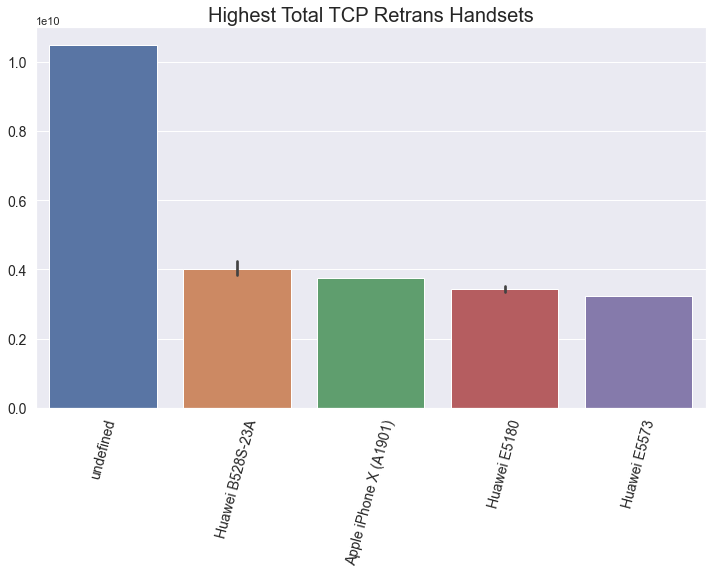

In [276]:
# top 10
#df = network_per_user_df.
result = network_per_user_df.sort_values(by='Total TCP Retrans', ascending=False)[:100]
plot_bar(result, result['Handset Type'], result['Total TCP Retrans'], 'Highest Total TCP Retrans Handsets','','')

In [277]:
# Bottom 5
network_per_user_df.sort_values(by='Total TCP Retrans', ascending=True)[:10]

,MSISDN/Number,Handset Type,Total TCP Retrans,Total Throughput,Total RTT
23472,"33,650,128,412.00",Apple iPhone 5S (A1457),97.00,"60,460.00",48.00
6359,"33,614,777,138.00",Huawei Ascend Mate7,128.00,"16,996.00",64.00
96977,"33,762,062,356.00",Apple iPhone 8 (A1905),129.00,"63,080.00",41.00
13546,"33,626,357,513.00",Apple iPhone 7 (A1778),134.00,"20,256.00",40.00
2177,"33,607,833,304.00",Apple iPhone 5C (A1529),143.00,"32,484.00",32.00
102198,"33,769,636,458.00",Apple iPhone 5S (A1457),176.00,"23,964.00",32.00
25863,"33,650,681,239.00",Xiaomi Communica. Mi Max3,176.00,"13,162.00",52.00
105775,"33,784,203,839.00",Apple iPhone Xr (A2108),177.00,"11,042.00",74.00
78100,"33,679,366,089.00",Samsung Galaxy S6 Plus (Sm-G928),179.00,"67,788.00",39.00
89395,"33,699,694,715.00",Samsung Galaxy Trend Lite 2 (Sm-G318X),182.00,182.00,169.00


In [278]:
# most frequent
network_per_user_df['Total TCP Retrans'].value_counts().head(10)

2,660.00     47449
5,320.00      7662
7,980.00      1108
2,624.00       363
10,640.00      293
3,990.00       154
2,648.00       136
6,650.00       107
5,284.00       107
13,300.00       93
Name: Total TCP Retrans, dtype: int64

#### Task 3.3 - Compute & report:

1. The distribution of the average throughput  per handset type and provide interpretation for your findings.
2. The average TCP retransmission view per handset type and provide interpretation for your findings.

In [279]:
handset_throughput = network_per_user_df.groupby('Handset Type').agg({'Total Throughput': 'sum'}).reset_index()
handset_throughput.sort_values(by='Total Throughput', ascending=False).head(5)

## Huawi is leading but apple is follwoing closely

,Handset Type,Total Throughput
316,Huawei B528S-23A,"1,440,008,494.00"
1393,undefined,"195,820,540.00"
59,Apple iPhone 7 (A1778),"135,674,378.00"
53,Apple iPhone 6S (A1688),"130,004,954.00"
49,Apple iPhone 6 (A1586),"118,531,110.00"


In [280]:
handset_rtt = network_per_user_df.groupby('Handset Type').agg({'Total RTT': 'sum'}).reset_index()
handset_rtt.sort_values(by='Total RTT', ascending=False).head(5)


,Handset Type,Total RTT
316,Huawei B528S-23A,"2,995,417.00"
1393,undefined,"999,155.00"
49,Apple iPhone 6 (A1586),"913,046.00"
53,Apple iPhone 6S (A1688),"730,817.00"
59,Apple iPhone 7 (A1778),"703,139.00"


#### Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster

In [281]:
handset= network_per_user_df['Handset Type'].unique()
net_cluster_df = network_per_user_df.copy()
net_cluster_df.drop('Handset Type', axis=1, inplace=True)
net_cluster_df = net_cluster_df.set_index('MSISDN/Number')

net_cluster_df.head()

,Total TCP Retrans,Total Throughput,Total RTT
MSISDN/Number,,,
"33,601,001,722.00","2,660.00",74.00,46.00
"33,601,001,754.00","2,660.00",96.00,31.00
"33,601,002,511.00","2,660.00",96.00,33.00
"33,601,007,832.00","2,396.00",408.00,84.00
"33,601,008,617.00","9,373,492.00","80,790.00",119.00


In [282]:
## First normalize the Data, Then Cluster
min_max_scaler = preprocessing.MinMaxScaler()
network_values = net_cluster_df.values

scalled_values = min_max_scaler.fit_transform(network_values)
df_network_normalized = pd.DataFrame(data=scalled_values, columns=df2.columns)


kmeans = KMeans(n_clusters=3).fit(df_normalized)

In [283]:
cluster = kmeans.predict(df_network_normalized)
experiance_df = network_per_user_df.copy()
experiance_df['cluster-experiance']  = cluster
experiance_df = experiance_df.set_index('MSISDN/Number')
experiance_df.head()

,Handset Type,Total TCP Retrans,Total Throughput,Total RTT,cluster-experiance
MSISDN/Number,,,,,
"33,601,001,722.00",Huawei P20 Lite Huawei Nova 3E,"2,660.00",74.00,46.00,0
"33,601,001,754.00",Apple iPhone 7 (A1778),"2,660.00",96.00,31.00,0
"33,601,002,511.00",undefined,"2,660.00",96.00,33.00,0
"33,601,007,832.00",Apple iPhone 5S (A1457),"2,396.00",408.00,84.00,0
"33,601,008,617.00",Apple iPhone Se (A1723),"9,373,492.00","80,790.00",119.00,0


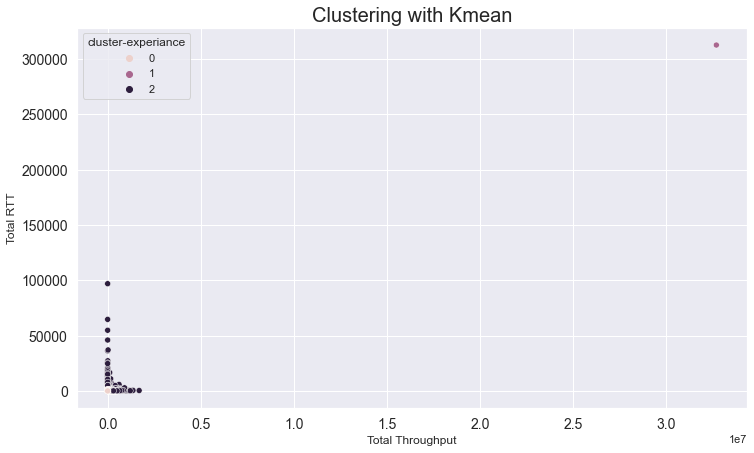

In [284]:
plot_scatter(experiance_df,"Total Throughput", "Total RTT","Clustering with Kmean", "cluster-experiance", "")

In [285]:
experiance_df['cluster-experiance'].value_counts()


0    99741
2     7114
1        1
Name: cluster-experiance, dtype: int64

### Task 4 - Satisfaction Analysis

1. engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) 

2. experience score to each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience’s cluster.

In [286]:
## Engagement Score
lowest_engagement = eng_df.groupby('cluster-engagement').get_group(0).mean()
lowest_engagement

Bearer Id                      1.25
Dur. (ms).1          115,587,132.79
Total                617,096,507.70
cluster-engagement             0.00
dtype: float64

In [287]:
def get_engagement_score(df, lowest):
    x = float(lowest['Bearer Id'])
    y = float(lowest['Dur. (ms).1'])
    z = float(lowest['Total'])
    new_df = df.copy()
    new_df['engagement score'] = ((df['Bearer Id'] - x)**2 + (df['Dur. (ms).1'] - y)**2 + (df['Total'] - z)**2)**0.5
    return new_df
engagement_scored_df = get_engagement_score(eng_df, lowest_engagement)
engagement_scored_df.head()

,Bearer Id,Dur. (ms).1,Total,cluster-engagement,engagement score
MSISDN/Number,,,,,
33601001722,1,"116,720,140.00","878,690,574.00",0,"261,596,519.91"
33601001754,1,"181,230,963.00","156,859,643.00",0,"464,894,702.14"
33601002511,1,"134,969,374.00","595,966,483.00",0,"28,673,144.55"
33601007832,1,"49,878,024.00","422,320,698.00",0,"205,560,947.22"
33601008617,2,"37,104,453.00","1,457,410,944.00",0,"843,971,494.11"


In [288]:
lowest_experiance = experiance_df.groupby('cluster-experiance').get_group(0).mean()
lowest_experiance

C:\Users\user\AppData\Local\Temp\ipykernel_5924\4270665471.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lowest_experiance = experiance_df.groupby('cluster-experiance').get_group(0).mean()


Total TCP Retrans    1,561,760.32
Total Throughput        22,287.70
Total RTT                  119.27
cluster-experiance           0.00
dtype: float64

In [289]:
def get_experiance_score(df, low):
    x = float(low['Total RTT'])
    y = float(low['Total TCP Retrans'])
    z = float(low['Total Throughput'])
    new_df = df.copy()
    new_df['experience score'] = ((df['Total RTT'] - x)**2 + (df['Total TCP Retrans'] - y)**2 \
                              + (df['Total Throughput'] - z)**2 )**0.5
    return new_df
experiance_scored_df = get_experiance_score(experiance_df, lowest_experiance)
experiance_scored_df.head()

,Handset Type,Total TCP Retrans,Total Throughput,Total RTT,cluster-experiance,experience score
MSISDN/Number,,,,,,
"33,601,001,722.00",Huawei P20 Lite Huawei Nova 3E,"2,660.00",74.00,46.00,0,"1,559,258.56"
"33,601,001,754.00",Apple iPhone 7 (A1778),"2,660.00",96.00,31.00,0,"1,559,258.25"
"33,601,002,511.00",undefined,"2,660.00",96.00,33.00,0,"1,559,258.25"
"33,601,007,832.00",Apple iPhone 5S (A1457),"2,396.00",408.00,84.00,0,"1,559,517.81"
"33,601,008,617.00",Apple iPhone Se (A1723),"9,373,492.00","80,790.00",119.00,0,"7,811,950.74"


#### Task 4.2 - Consider the average of both engagement & experience scores as the satisfaction score & report the top 10 satisfied customer

In [290]:
satisfaction_df = pd.merge(engagement_scored_df["engagement score"], experiance_scored_df['experience score'], on='MSISDN/Number')
satisfaction_df['satisfaction score'] = (satisfaction_df['engagement score'] + satisfaction_df['experience score']) / 2

In [292]:
satisfaction_df.sort_values(by='satisfaction score', ascending=False).head(5)

,engagement score,experience score,satisfaction score
MSISDN/Number,,,
33663706799,"536,275,292,501.93","1,560,255.40","268,138,426,378.67"
33626320676,"11,373,715,228.97","10,474,218,104.49","10,923,966,666.73"
33625779332,"20,052,444,619.57","1,270,605.53","10,026,857,612.55"
33614892860,"12,836,162,159.57","2,098,314.02","6,419,130,236.79"
33760536639,"12,097,501,610.46","32,977,583.69","6,065,239,597.07"


#### Task 4.3 - Build a regression model of your choice to predict the satisfaction score of a customer.

In [293]:
regretion_df = pd.merge(eng_df[['Bearer Id', 'Dur. (ms).1', 'Total']],\
                        experiance_df[['Total RTT','Total TCP Retrans', 'Total Throughput']],\
                       on='MSISDN/Number')
regretion_df = pd.merge(regretion_df,satisfaction_df['satisfaction score'], on='MSISDN/Number' )
regretion_df.head()

,Bearer Id,Dur. (ms).1,Total,Total RTT,Total TCP Retrans,Total Throughput,satisfaction score
MSISDN/Number,,,,,,,
33601001722,1,"116,720,140.00","878,690,574.00",46.00,"2,660.00",74.00,"131,577,889.23"
33601001754,1,"181,230,963.00","156,859,643.00",31.00,"2,660.00",96.00,"233,226,980.19"
33601002511,1,"134,969,374.00","595,966,483.00",33.00,"2,660.00",96.00,"15,116,201.40"
33601007832,1,"49,878,024.00","422,320,698.00",84.00,"2,396.00",408.00,"103,560,232.52"
33601008617,2,"37,104,453.00","1,457,410,944.00",119.00,"9,373,492.00","80,790.00","425,891,722.43"


In [294]:
X = regretion_df[['Bearer Id', 'Dur. (ms).1', 'Total','Total RTT','Total TCP Retrans', 'Total Throughput']].values
X = StandardScaler().fit_transform(X)
X.shape

(106856, 6)

In [295]:
y = regretion_df[['satisfaction score']].values
y = StandardScaler().fit_transform(y)
y.shape

(106856, 1)

In [296]:
model = LinearRegression().fit(X, y)
model.score(X, y)

0.9793539178987796

In [300]:
pickle.dump(model, open('C:/Users/user/Desktop/Telecommunication/model/Telecom_Satisfaction_Model.sav', 'wb'))

#### Task 4.4 - Run a k-means (k=2) on the engagement & the experience score .

In [301]:
eng_exp_df = satisfaction_df[['engagement score', 'experience score']]

In [302]:
min_max_scaler = preprocessing.MinMaxScaler()
eng_exp_values = eng_exp_df.values

scalled_values = min_max_scaler.fit_transform(eng_exp_values)
eng_exp_normalized = pd.DataFrame(data=scalled_values, columns=eng_exp_df.columns)


kmeans = KMeans(n_clusters=2).fit(eng_exp_normalized)

#### Task 4.5 - Aggregate the average satisfaction & experience score per cluster.

In [303]:
eng_exp_df['clusters'] = kmeans.labels_
eng_exp_df['clusters'].value_counts()

0    106626
1       230
Name: clusters, dtype: int64

In [304]:
result = eng_exp_df.groupby('clusters').mean()
result

,engagement score,experience score
clusters,,
0,"364,166,433.58","6,888,690.09"
1,"776,765,310.85","2,984,904,894.91"


#### Task 4.6 - Export your final table containing all user id + engagement, experience & satisfaction scores in your local MySQL database. Report a screenshot of a select query output on the exported table. 

In [305]:
satisfaction_df = satisfaction_df.reset_index()
satisfaction_df.head()
satisfaction_df.to_csv('C:/Users/user/Desktop/Telecommunication/data/Telecom_User_Satisfaction.csv')

#### Task 4.7 Model deployment tracking- deploy the model and monitor your model. Here you can use Docker or other MlOps tools which can help you to track your model’s change.  Your model tracking report includes code version, start and end time, source, parameters, metrics (loss convergence) and artifacts or any output file regarding each specific run. (CSV file, screenshot)